## Hierarchical Clustering
Hierarchical clustering is an unsupervised machine learning algorithm that seeks to group similar objects into the same cluster. It's called hierarchical clustering because it creates a hierarchy of clusters which can be represented on a tree diagram called a dendrogram.

**Initialization:** At the start, each individual object is considered a single cluster, hence if there are $N$ objects, we have $N$ clusters.
**Merging:** The algorithm then merges two clusters that are closest to each other in terms of chosen distance metric (Euclidean distance, Manhattan distance etc.). This reduces the total number of clusters by one.
**Iterative process:** Merging is repeated until all objects are in a single cluster.
<br><br>
There are two main types of clustering:

1. **Agglomerative Hierarchical Clustering (bottom-up approach):**<br>
In this approach, we start with individual objects (each considered a single cluster) and combine them iteratively to form larger clusters. This process continues until all the objects are in a single cluster or until some stopping criteria are met.

2. **Divisive Hierarchical Clustering (top-down approach):**<br>
In this approach, we start with one large cluster of all objects and divide or split the clusters iteratively into smaller clusters. This continues until each object forms a single cluster or until some stopping criteria are met. 


A key feature of hierarchical clustering is that it does not require the user to specify the number of clusters in advance, unlike many other clustering algorithms such as k-means. <br><br>
Hierarchical clustering can be applied in many areas including but not limited to, recommendation engines, anomaly detection, natural language processing and bioinformatics (for example, gene analysis). <br><br>
However it is important to note that hierarchical clustering can be sensitive to the choice of the distance metric and can be computationally expensive for large datasets because at each *iteration*, distances need to be computed between each and every pair of clusters. <br><br>
It is also worth noting that once a decision is made to combine two clusters, it **cannot** be undone. This may lead to suboptimal solutions, especially if outliers are present in the data.

### How do I choose the right method for Hierarchical Clustering?
One of the problems with any kind of clustering method is that clusters are always created may not always have meaning - we don't often know what aspects of the data are most important. <br>
| Distance Metric             | Description                                                                                         |
|----------------------------|-----------------------------------------------------------------------------------------------------|
| **Euclidean distance**              | Usual square distance between the two vectors ($L_2$ norm).                                         |
| **Maximum Distance**                | Maximum distance between two components of $x$ and $y$ (supremum norm).                             |
| **Manhattan Distance**              | Absolute distance between the two vectors ($L_1$ norm).                                             |
| **Canberra Distance**               | Sum of $\frac{ \|x_i - y_i \|}{ \|x_i + y_i \|}$ ; terms where both numerator and denominator are zero are skipped. |
| **Minkowski Distance**              | The $p$ norm, the $p$ th root of the sum of the $p$ th powers of the differences of the components.   |
| **Correlation Distance**            | $1 - r$ where $r$ is the Pearson or Spearman correlation.                                           |
| **Absolute Correlation Distance**   | $1 - \|r\|$                                                                                         |

<br>
The choice of distance metric depends on the shape, scale, and noise in your data. For example:

1. **Euclidean distance** - Good default for spherical clusters and when features are on similar scales ($L_2$ norm).
2. **Maximum Distance** - Sensitive to outliers; emphasizes the largest coordinate difference (supremum norm).
3. **Manhattan Distance** - Better for high-dimensional or grid-like data where movement is axis-aligned ($L_1$ norm).
4. **Canberra Distance** - Useful when values close to zero are important; emphasizes proportional differences.
5. **Minkowski Distance** - Generalized distance metric — tuning the $p$ parameter lets you interpolate between $L1$ and $L2$ norms.
6. **Correlation Distance** - Ideal when the shape of the pattern matters more than magnitude; captures linear relationships.
7. **Absolute Correlation Distance** - Ignores sign of the correlation, treating +1 and -1 as equally similar.

Euclidean distance is the most widely used distance metric.

### Computational Complexity for Hierarchical Clustering:

| Type                              | Method                      | Complexity                  | Practicality                               |
|:---------------------------------|:---------------------------|:---------------------------|:-------------------------------------------|
| Agglomerative (Bottom-Up)     | Naive Implementation        | $O(n^3)$              | Impractical for large datasets      |
|                                   | Optimized (Priority Queue)  | $O(n^2 \log n)$         | Suitable for moderate datasets      |
| Divisive (Top-Down)           | Exhaustive Implementation   | $O(2^n)$                | Usually avoided due to exponential complexity |
|                                   | Approximate / Heuristic     | Highly variable, typically $O(n^2)$ to $O(n^3)$ | Feasible but still costly           |

### How to measure clusters before merging them
Once the distance between individual points is defined using a metric (like Euclidean or Manhattan), the next challenge is determining how to compute the distance between clusters as they grow and merge. This is where linkage methods come into play.<br><br>

The concept of linkage comes when you have more than 1 point in a cluster and the distance between this cluster and the remaining points/clusters has to be figured out to see where they belong. Linkage is a measure of the dissimilarity between clusters having multiple observations. 

| Linkage Method       | Formula                                                                                                         | Description                                                                                           |
|----------------------|------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Single Linkage**   | $Distance(C_1, C_2) = min \{ d(i, j) \}$, where $i \in C_1$, $j \in C_2$                                        | Distance between the two closest points in the clusters.                                              |
| **Complete Linkage** | $Distance(C_1, C_2) = \max \{ d(i, j) \}$, where $i \in C_1$, $j \in C_2$                                        | Distance between the two farthest points in the clusters.                                             |
| **Average Linkage**  | $Distance(C_1, C_2) = \text{average of all } d(i, j)$ between $i \in C_1$, $j \in C_2$                           | Average of all pairwise distances between points in the two clusters.                                 |
| **Ward’s Method**    | $Distance(C_1, C_2) = \Delta ESS = ESS_{merged} - (ESS_{C_1} + ESS_{C_2})$                                     | Increase in within-cluster variance (sum of squares); favors compact, spherical clusters.             |

**Comparison between Hierarchical Clustering, K-Means, and DBSCAN**
| Aspect | Hierarchical | K-Means | DBSCAN |
| --- | --- | --- | --- |
| Idea | Merge/Split clusters to form a tree | Iteratively refine K centroids | Grow clusters from dense regions in data |
| Number of clusters | determined after the fact | Must specify K beforehand | Discovered automatically based on density |
| Scalability | Generally less scalable | More scalable, efficient for large datasets | depends on chosen parameters |
| Shape of Clusters | Flexible, depending on linkage | Spherical  | Arbitrary |
| Outliers Handling | No explicit outlier handling (sensitive) | Sensitive to outliers | Outliers recognized and labeled as noise by default |
| Interpretability | High | Moderate | Moderate |
| Key Parameters | Linkage, distance metric | K + distance  | neighborhood radius, minimum cluster size. |


### Step-by-Step Instructions for Implementing Hierarchical Clustering
1. **Prepare Data:** Clean and preprocess the dataset.
2. **Choose a Distance Metric:** Select from options like Euclidean or Manhattan distance.
3. **Select a Linkage Criterion:** Choose methods like single, complete, or average linkage.
4. **Build the Dendrogram:** Use a clustering algorithm to create the tree.
5. **Determine Clusters:** Cut the dendrogram at the desired level to form clusters.


In [1]:
# loading required libraries
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data and viewing the the first few rows
# Note: The dataset is assumed to be in the same directory as this script.
data = pd.read_csv('pricerunner_aggregate.csv')
data.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [3]:
# checking data types and column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [4]:
print(repr(data.columns.tolist()))

['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID', ' Cluster Label', ' Category ID', ' Category Label']


In [5]:
# renaming columns for clarity
# Note: The leading spaces in the column names are removed for consistency.
data.rename(columns={'Product ID':'product_id',
                     'Product Title':'product_title', 
                     ' Merchant ID':'merchant_id', 
                     ' Cluster ID': 'cluster_id',
                     ' Cluster Label': 'cluster_label',
                     ' Category ID': 'category_id',
                     ' Category Label':'category_label'}, inplace=True)

data.head()

,product_id,product_title,merchant_id,cluster_id,cluster_label,category_id,category_label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [6]:
# preprocessing the data
data_processed = data.copy()
data_processed['product_title'] = pd.factorize(data['product_title'])[0]
data_processed['cluster_label'] = pd.factorize(data['cluster_label'])[0]
data_processed['category_label'], categories = pd.factorize(data['category_label'])

In [7]:
#Print the number of missing values in the data set
missing_values = data_processed.isnull().sum()
missing_values

product_id        0
product_title     0
merchant_id       0
cluster_id        0
cluster_label     0
category_id       0
category_label    0
dtype: int64

<Axes: >

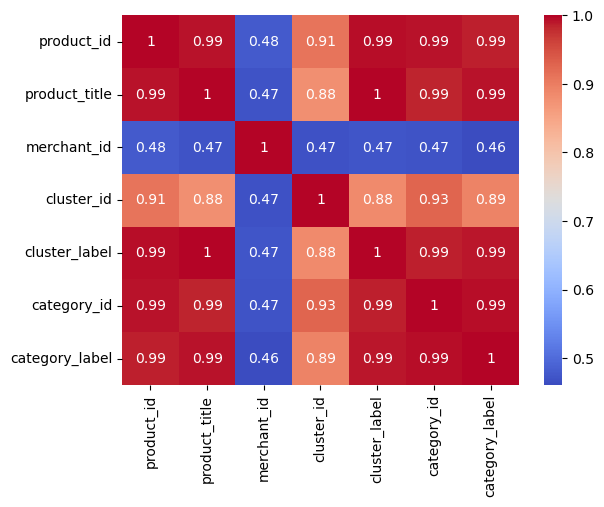

In [8]:
#Plot a heatmap of the data set
correlation_matrix = data_processed.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)

In [11]:
# random sampling of 5000 data points
data_small = data_processed.sample(n=5000, random_state=7679)

In [12]:
# extracting the feature set
data_feature = data_small[['product_title', 'category_label']]

In [13]:
# performing hierarchical clustering
hc_ward = linkage(data_feature, method='ward', metric='euclidean')

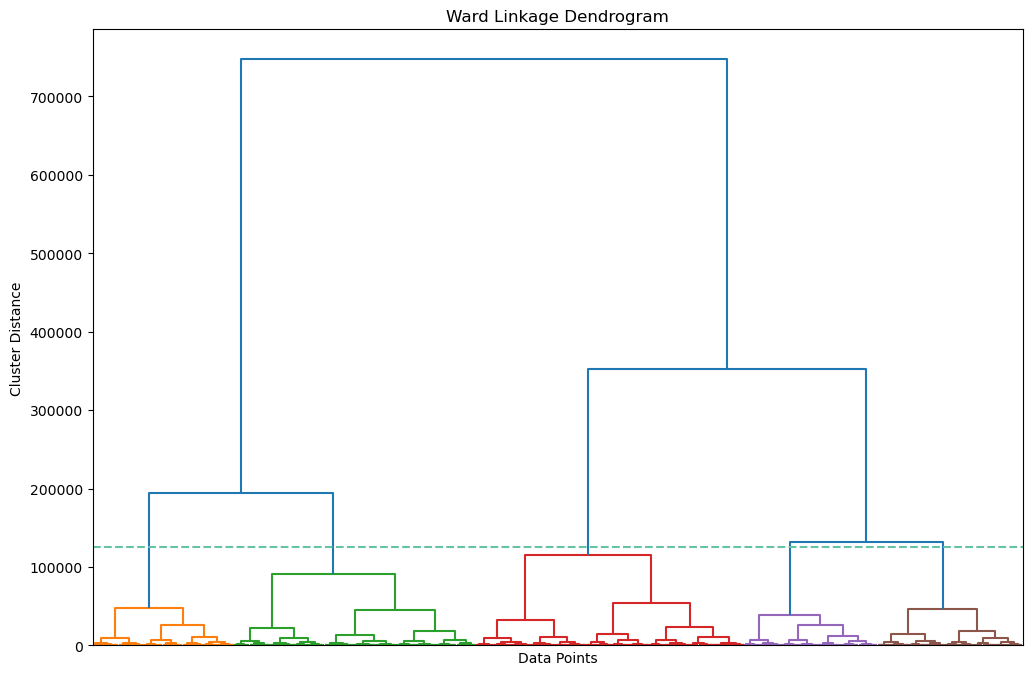

In [ ]:
# plotting the dendrogram (linkage method 'ward')
plt.figure(figsize=(12,8))
d_ward = dendrogram(hc_ward, leaf_rotation=90, leaf_font_size=10, color_threshold=125000)
plt.title('Ward Linkage Dendrogram')
plt.xticks([], [])  
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')

# plotting a horizontal line indicating the clustering point
colors = plt.get_cmap('Set2').colors 
plt.axhline(y=125000, color=colors[0], linestyle='--')
plt.show()

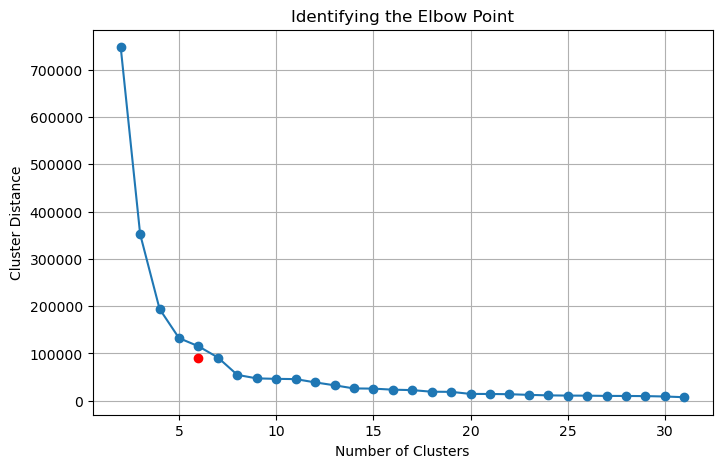

In [26]:
# plotting the elbow point
distances = hc_ward[-30:, 2]  
num_clusters = np.arange(31, 1, -1)  

plt.figure(figsize=(8, 5))
plt.plot(num_clusters, distances, marker='o')
plt.plot(6, distances[-6], color='red', marker='o')
plt.title('Identifying the Elbow Point')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Distance')
plt.grid(True)
plt.show()

In [ ]:
# cutting the dendrogram to form clusters
num_clusters = 6

# adding cluster membership to the original data
cluster_labels = cut_tree(hc_ward, n_clusters=num_clusters).flatten()

In [ ]:
# Alternate implementation of hierarchical clustering
# fitting agglomerative clustering
ac = AgglomerativeClustering(n_clusters= num_clusters, linkage='ward')
cluster_labels = ac.fit_predict(data_feature)

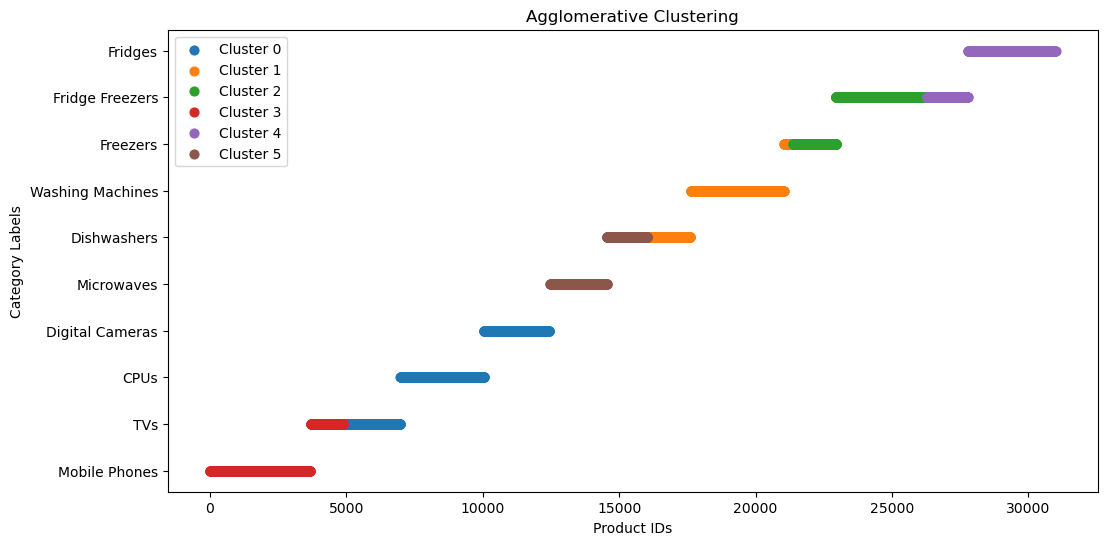

In [ ]:
# visualizing the clusters
data = np.array(data_feature.values)
#  Scatter plot for the visualizing the clusters
plt.figure(figsize=(12, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_label)
    plt.scatter(data[cluster_indices, 0], data[cluster_indices, 1], s=40, label=f'Cluster {cluster_label}')

plt.yticks(np.arange(len(categories)), categories)
plt.title('Agglomerative Clustering')
plt.xlabel('Product IDs')
plt.ylabel('Category Labels')
plt.legend()
plt.show()

The scatterplot displays the six different clusters, each represented with a unique color. We can observe that the model has merged instances of "Dishwashers" and "Washing Machines," indicating a similarity between these categories. This merge is logical, as both these devices are used for washing. Similarly, "CPUs" and "TVs" have been combined into one cluster. However, we can observe that the model is confused between the "fridges," "Fridge freezers," and "freezers" categories. This confusion can be fixed with more training data.

### Limitations of Hierarchical Clustering

While hierarchical clustering is a valuable tool, it has some limitations that users should be aware of. One of the key drawbacks is its computational inefficiency, especially with large datasets, as the algorithm requires calculating distances between all pairs of data points, resulting in high time and memory complexity. Additionally, hierarchical clustering is sensitive to the choice of distance metrics and linkage criteria, which can significantly impact the resulting clusters. Finally, it tends to perform poorly when data contains noise or outliers, as these can distort the cluster structure and lead to misleading results.

## Use Cases of Hierarchical Clustering

1. **Business** -Hierarchical clustering can help analyze trends and segment customer data—-for example, grouping by product choice, demographic, purchasing behavior, risk profile or interactions with social media.

2. **Clinical research and bioinformatics** - Patient cohorts for clinical research can run into the thousands. Hierarchical clustering helps categorize mixed populations into more homogeneous groups20 by using, for example, diagnostic criteria, physiological responses or DNA mutations. It can also be applied to group species by biological features to understand evolutionary development.

3. **Image and information processing** - Hierarchical clustering is used in image-based text recognition applications to group handwritten characters by their shape. It is also used to store and retrieve information by using certain criteria or to categorize search results.

4. **Urban Planning** - Segmenting cities or neighborhoods based on infrastructure usage, transportation patterns, or population behavior or at what times of the day the population is most accumulated in which areas etc.